In [14]:
import echopype as ep
import xarray as xr
import numpy as np
import glob
import hvplot.xarray 
import matplotlib.pyplot as plt

In [9]:
path = '//a43-p1-filc01/mk20/nasgul/Miljoteknologi/302004410-21_SFI_Harvest/fieldwork_2024/2024_campaign/Autonaut_CW/ek80_ncfiles'
fn = glob.glob(f'{path}/*.nc')
file_name = fn[9]
autonaut = xr.open_dataset(file_name)

In [16]:
autonaut

<xarray.Dataset> Size: 31MB
Dimensions:                        (channel: 1, ping_time: 208,
                                    range_sample: 6286, filenames: 1)
Coordinates:
  * channel                        (channel) <U37 148B 'WBT Mini 269674-7 ES2...
  * ping_time                      (ping_time) datetime64[ns] 2kB 2024-06-04T...
  * range_sample                   (range_sample) int32 25kB 0 1 2 ... 6284 6285
  * filenames                      (filenames) int32 4B 0
Data variables: (12/25)
    Sv                             (channel, ping_time, range_sample) float64 10MB ...
    echo_range                     (channel, ping_time, range_sample) float64 10MB ...
    frequency_nominal              (channel) float64 8B ...
    sound_speed                    float64 8B ...
    sound_absorption               (channel) float64 8B ...
    temperature                    float64 8B ...
    ...                             ...
    impedance_transducer           (channel) int32 4B ...
    impedance_transceiver          (channel) int32 4B ...
    receiver_sampling_frequency    (channel) float64 8B ...
    source_filenames               (filenames) <U80 320B ...
    water_level                    float64 8B ...
    depth                          (channel, ping_time, range_sample) float64 10MB ...
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.8.3
    processing_time:              2024-12-05T11:06:36Z
    processing_function:          calibrate.compute_Sv

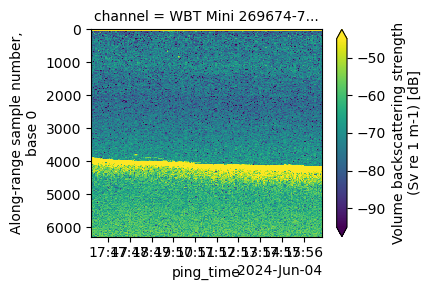

In [8]:
autonaut.Sv.plot(x="ping_time", y="range_sample", #define axes
             col="channel", #define face or columns
             col_wrap=1,  #how many columns per row
             cmap='viridis', #colourmap
             yincrease=False, # increasing or decreasing y axis
             vmin=-95, #colorbar min
             vmax=-45 #colorbar max
            )

In [10]:
autonaut.Sv.hvplot(
    groupby="channel",
    cmap="RdYlBu_r",
    x='ping_time',
    y='range_sample',
    clim=(-85,-45)).opts(invert_yaxis=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'41b94bb2-6831-4473-847d-2cd5324f2a18': {'version…

In [5]:
autonaut = autonaut.assign(Sv_lin = 10**(autonaut.Sv/10))
autonaut

<xarray.Dataset> Size: 42MB
Dimensions:                        (channel: 1, ping_time: 208,
                                    range_sample: 6286, filenames: 1)
Coordinates:
  * channel                        (channel) <U37 148B 'WBT Mini 269674-7 ES2...
  * ping_time                      (ping_time) datetime64[ns] 2kB 2024-06-04T...
  * range_sample                   (range_sample) int32 25kB 0 1 2 ... 6284 6285
  * filenames                      (filenames) int32 4B 0
Data variables: (12/26)
    Sv                             (channel, ping_time, range_sample) float64 10MB ...
    echo_range                     (channel, ping_time, range_sample) float64 10MB ...
    frequency_nominal              (channel) float64 8B ...
    sound_speed                    float64 8B ...
    sound_absorption               (channel) float64 8B ...
    temperature                    float64 8B ...
    ...                             ...
    impedance_transceiver          (channel) int32 4B ...
    receiver_sampling_frequency    (channel) float64 8B ...
    source_filenames               (filenames) <U80 320B ...
    water_level                    float64 8B ...
    depth                          (channel, ping_time, range_sample) float64 10MB ...
    Sv_lin                         (channel, ping_time, range_sample) float64 10MB ...
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.8.3
    processing_time:              2024-12-05T11:06:36Z
    processing_function:          calibrate.compute_Sv

In [6]:
#Define the window sizes
rm = 20 #range / depth window size
tm = 2 #ping_time window size 

#we use Sv_lin and want to compute a rolling function, here we select mean
ds_mean = autonaut.Sv_lin.rolling(range_sample=rm, #we wanth the depth dim to be summarised by rm
                              ping_time = tm, #we want distance to be summarised y tm
                              center=True).mean(skipna=True) #we want the mean to be computer

# We do a back transformation into log space
ds_mean = 10 * np.log10(ds_mean) 

ds_mean

<xarray.DataArray 'Sv_lin' (channel: 1, ping_time: 208, range_sample: 6286)> Size: 10MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * channel       (channel) <U37 148B 'WBT Mini 269674-7 ES200-7CDK-Split_ES'
  * ping_time     (ping_time) datetime64[ns] 2kB 2024-06-04T17:46:14.23816704...
  * range_sample  (range_sample) int32 25kB 0 1 2 3 4 ... 6282 6283 6284 6285

In [7]:
# and we do a nice interactive plot
ds_mean.hvplot(groupby="channel", #grouping element
               cmap="RdYlBu_r", #colormap
               x='ping_time', #x axis
               y='range_sample',#y axis
               clim=(-75,-32)).opts(invert_yaxis=True) #colormap limits and inverted y axis

BokehModel(combine_events=True, render_bundle={'docs_json': {'2fb4a266-862a-458a-a003-b2f54bde4892': {'version…

In [15]:
for i in np.arange(len(fn)):
    file_name = fn[i]
    autonaut = xr.open_dataset(file_name)
    autonaut.Sv.hvplot(
        groupby="channel",
        cmap="RdYlBu_r",
        x='ping_time',
        y='range_sample',
        clim=(-85,-45)).opts(invert_yaxis=True)
    

KeyboardInterrupt: 